In [11]:
import random
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
import graphviz
from string import punctuation
from matplotlib import pyplot as plt




In [12]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [3]:
class LemmaTokenizer(object):
	def __init__(self):
		self.wnl = nltk.stem.WordNetLemmatizer()
	def __call__(self, doc):
		return [self.wnl.lemmatize(t) for t in nltk.word_tokenize(doc)]


In [4]:
df = pd.read_csv('Main.csv',encoding='latin1',keep_default_na=False);
df = df[1:500];
dfx = df['tweet'];
dfy = df['class'];


In [5]:
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, train_size = 0.8, test_size = 0.2, random_state = random.randrange(99999), shuffle = True)

cv = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words=stop_words, binary=True)
cv_matrix_train = cv.fit_transform(x_train)
vocab = cv.get_feature_names()


In [6]:

cv_matrix_train = cv_matrix_train.toarray()
cv_matrix_test =  cv.transform(x_test)

clf = LinearSVC();
clf.fit(cv_matrix_train, y_train);
y_pred_train = clf.predict(cv_matrix_train)
y_pred_test = clf.predict(cv_matrix_test)
print('Training Accuracy {}'.format(clf.score(cv_matrix_train, y_train)))

cmtrain = metrics.confusion_matrix(y_pred_train, y_train);
cmtest = metrics.confusion_matrix(y_pred_test, y_test);

print('Training Confusion = {}'.format(cmtrain))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(clf.score(cv_matrix_test, y_test)))
print('Test Confusion = {}'.format(cmtest))
print(classification_report(y_test, y_pred_test))






Training Accuracy 0.9966205992131545
Training Confusion = [[ 1092     7     0]
 [   51 15340     4]
 [    1     4  3327]]
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1144
          1       1.00      1.00      1.00     15351
          2       1.00      1.00      1.00      3331

avg / total       1.00      1.00      1.00     19826

Test Accuracy 0.8874319144643937
Test Confusion = [[  85  101   11]
 [ 178 3618  125]
 [  23  120  696]]
             precision    recall  f1-score   support

          0       0.43      0.30      0.35       286
          1       0.92      0.94      0.93      3839
          2       0.83      0.84      0.83       832

avg / total       0.88      0.89      0.88      4957



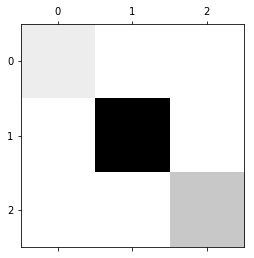

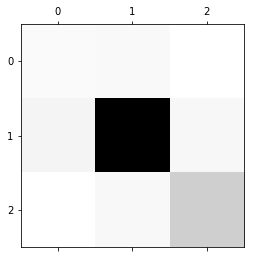